Chargement des données: Ces données sur les voitures proviennent de la magazine "the 1974 Motor Trend US"

In [2]:
#Chargement des données_Première façon
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [3]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
##Chargement des données_Deuxième façon

#import pandas as pd
#import CSV Cars
#X = pd.read_csv('Cars.csv')


In [ ]:
import pandas as pd
import io
#import required libraries
import numpy 
import matplotlib.pyplot as plt

X = pd.read_csv(io.StringIO(uploaded['Cars.csv'].decode('utf-8')),header=0,index_col=0)
#Affichage des 5 premières lignes
X.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


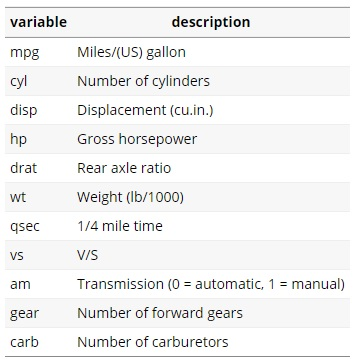

In [ ]:
X.keys()
print(X.shape) 
#nombre d'observations/lignes
n = X.shape[0]
#nombre de variables/colonnes
p = X.shape[1]


(32, 11)


La plupart du temps, en machine Learning, les données Set proviennent avec des ordres de grandeurs différents. Cette différence d’échelle peut conduire à des performances moindres. Pour palier à cela, des traitements préparatoires sur les données existent. Notamment le Feature Scaling qui comprend la Standardisation (z-score normalisation) et la Normalisation(Min-Max scaling).

Maintenant, nous faison un centrage réduction des données pour réaliser une ACP normée avec PCA. Pour ce faire, nous utilisons la Ttechnique de standardisation (classe StandardScaler) .
Nous instancions l’objet et nous l’appliquons sur la matrice X. Nous obtenons une matrice Z
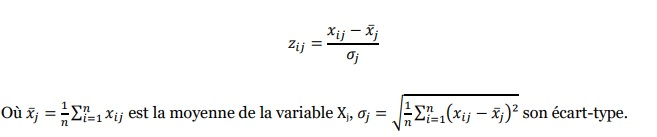

In [ ]:
from sklearn.preprocessing import StandardScaler
#https://mrmint.fr/data-preprocessing-feature-scaling-python


In [ ]:
from sklearn.preprocessing import StandardScaler
#instanciation de l'objet
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)



[[ 1.53299135e-01 -1.06667720e-01 -5.79750316e-01 -5.43654869e-01
   5.76594481e-01 -6.20166581e-01 -7.89600577e-01 -8.81917104e-01
   1.20894105e+00  4.30331483e-01  7.46967077e-01]
 [ 1.53299135e-01 -1.06667720e-01 -5.79750316e-01 -5.43654869e-01
   5.76594481e-01 -3.55382189e-01 -4.71201785e-01 -8.81917104e-01
   1.20894105e+00  4.30331483e-01  7.46967077e-01]
 [ 4.56736599e-01 -1.24445674e+00 -1.00602601e+00 -7.95569902e-01
   4.81584062e-01 -9.31677630e-01  4.32823359e-01  1.13389342e+00
   1.20894105e+00  4.30331483e-01 -1.14010764e+00]
 [ 2.20729683e-01 -1.06667720e-01  2.23615417e-01 -5.43654869e-01
  -9.81576392e-01 -2.33633287e-03  9.04735855e-01  1.13389342e+00
  -8.27170192e-01 -9.46729262e-01 -1.14010764e+00]
 [-2.34426513e-01  1.03112130e+00  1.05977159e+00  4.19549669e-01
  -8.48561806e-01  2.31296954e-01 -4.71201785e-01 -8.81917104e-01
  -8.27170192e-01 -9.46729262e-01 -5.11082737e-01]
 [-3.35572334e-01 -1.06667720e-01 -4.69056970e-02 -6.17747526e-01
  -1.58964307e+00  

In [ ]:
#vérification_Centrage Réduction 
import numpy as np
#moyenne
print(np.mean(Z,axis=0))
#écart-type
print(np.std(Z,axis=0,ddof=0))

[-4.99600361e-16  2.77555756e-17  1.66533454e-16  0.00000000e+00
 -3.05311332e-16  5.55111512e-17 -1.47104551e-15  0.00000000e+00
  0.00000000e+00 -2.77555756e-17 -2.77555756e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
#Analyse en composantes principales avec PCA de "scikit-learn"
from sklearn.decomposition import PCA
#instanciation de l'objet
acp = PCA(svd_solver='full')
# Affichage des paramètres
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
print(acp)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)


svd_solver = ‘full’: indique l’algorithme utilisé pour la décomposition en valeurs singulières --> C'est un ‘’exact Full SVD’’(par défaut pour l’appréhension des bases de taille réduite, mais il y a  d’autres approches pour le traitement des grands ensembles de données. 
Le nombre de composantes (K) n’étant pas spécifié (n_components = None, il est par défaut égal au nombre de variables (K = p). 

In [ ]:
#Appliquer l'ACP
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) 


11


In [ ]:

#Proportions de variance associées aux axes
print(acp.explained_variance_ratio_)

[0.60076366 0.24095163 0.05701793 0.02450886 0.02031374 0.01923601
 0.01229654 0.01117286 0.00700424 0.00473049 0.00200404]


Pour obtenir les valeurs propres associées aux axes factoriels:

In [ ]:
#Par la propriété .explained_variance_ (calcul de la variance expliquée)
eigval = (n-1)/n*acp.explained_variance_
print(eigval)


[6.60840025 2.65046789 0.62719727 0.26959744 0.2234511  0.21159612
 0.13526199 0.12290143 0.07704665 0.05203544 0.02204441]


In [ ]:
#Par les valeurs singulières .singular_values_
# issues de la factorisation de la matrice des données centrées et réduites (Matrice de corrélation)

print(acp.singular_values_**2/n) 

[6.60840025 2.65046789 0.62719727 0.26959744 0.2234511  0.21159612
 0.13526199 0.12290143 0.07704665 0.05203544 0.02204441]


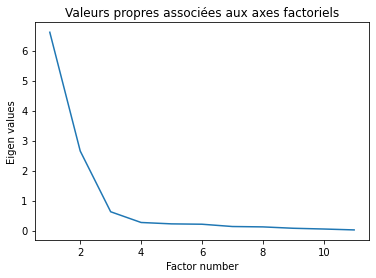

In [ ]:
#scree plot
plt.plot(numpy.arange(1,p+1),eigval)
plt.title("Valeurs propres associées aux axes factoriels")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

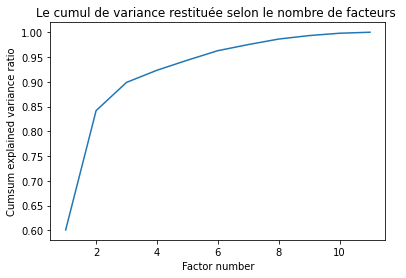

In [ ]:
#La variance expliquée cumulée 
plt.plot(numpy.arange(1,p+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Le cumul de variance restituée selon le nombre de facteurs ")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


# Détermination du nombre de facteur à retenir

- Critère de Kaiser: on ne retient que les axes dont l’inertie est
supérieure à l’inertie moyenne I/p (un peu étroit).
Kaiser en ACP normée: I/p= 1 : On ne retiendra que les axes
associés à des valeurs propre supérieures à 1
- Critère du coude: sur l’eboulis des valeurs propres, on observe un
décrochement (coude) suivi d’une décroissance régulière. On
sélectionne les axes avant le décrochement

In [ ]:
#seuils pour test des bâtons brisés
import pandas as pd
bs = 1/numpy.arange(p,0,-1)
bs = numpy.cumsum(bs)
bs = bs[::-1]
#Afficher conjointement les valeurs propres et les seuils 
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))


    Val.Propre    Seuils
0     6.608400  3.019877
1     2.650468  2.019877
2     0.627197  1.519877
3     0.269597  1.186544
4     0.223451  0.936544
5     0.211596  0.736544
6     0.135262  0.569877
7     0.122901  0.427020
8     0.077047  0.302020
9     0.052035  0.190909
10    0.022044  0.090909


Avec cette procédure, seul le premier facteur est valid.

# Etude des individus

 

Représentation des individus

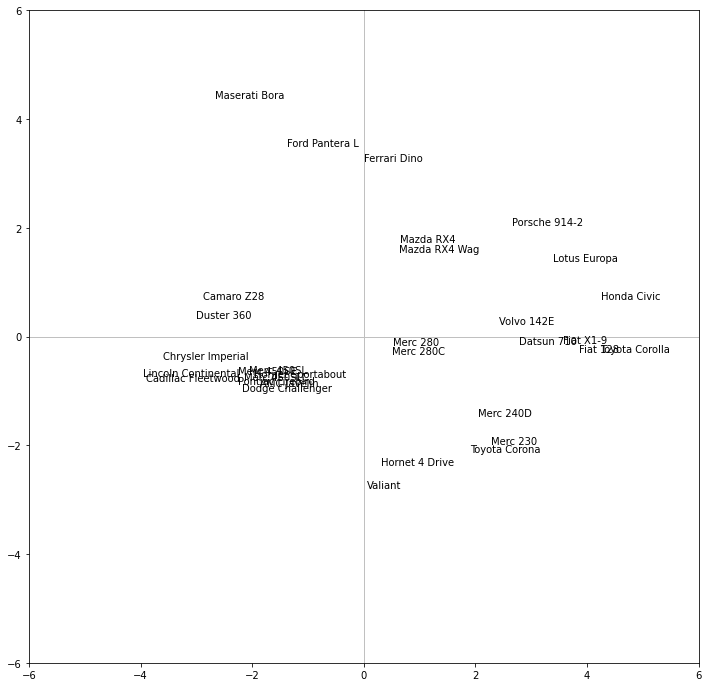

In [ ]:
 #positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n): plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [ ]:
#contribution des individus dans l'inertie totale
di = numpy.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                     ID        d_i
0             Mazda RX4   4.989548
1         Mazda RX4 Wag   4.329800
2            Datsun 710   8.921867
3        Hornet 4 Drive   6.353775
4     Hornet Sportabout   6.032381
5               Valiant   9.082064
6            Duster 360  10.156018
7             Merc 240D   8.070415
8              Merc 230  13.934540
9              Merc 280   3.635009
10            Merc 280C   4.053005
11           Merc 450SE   6.053031
12           Merc 450SL   5.341587
13          Merc 450SLC   5.845360
14   Cadillac Fleetwood  17.372037
15  Lincoln Continental  17.741435
16    Chrysler Imperial  14.698640
17             Fiat 128  15.878871
18          Honda Civic  20.680239
19       Toyota Corolla  19.201411
20        Toyota Corona   9.294439
21     Dodge Challenger   7.731357
22          AMC Javelin   5.594192
23           Camaro Z28  10.773466
24     Pontiac Firebird   7.401540
25            Fiat X1-9  13.208441
26        Porsche 914-2  13.994532
27         Lotus Eur

Qualité de représentation des individus – COS² 

In [ ]:
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                     id        COS2_1    COS2_2
0             Mazda RX4  8.656680e-02  0.603616
1         Mazda RX4 Wag  9.149123e-02  0.554899
2            Datsun 710  8.658556e-01  0.002404
3        Hornet 4 Drive  1.529814e-02  0.878825
4     Hornet Sportabout  6.462799e-01  0.094345
5               Valiant  3.469941e-04  0.854629
6            Duster 360  8.877547e-01  0.011043
7             Merc 240D  5.234398e-01  0.266003
8              Merc 230  3.754869e-01  0.282347
9              Merc 280  7.622461e-02  0.007221
10            Merc 280C  6.397481e-02  0.025884
11           Merc 450SE  8.347309e-01  0.077174
12           Merc 450SL  7.850810e-01  0.087388
13          Merc 450SLC  7.897261e-01  0.109965
14   Cadillac Fleetwood  8.754509e-01  0.039460
15  Lincoln Continental  8.812753e-01  0.030316
16    Chrysler Imperial  8.782750e-01  0.012066
17             Fiat 128  9.365228e-01  0.005546
18          Honda Civic  8.750766e-01  0.022916
19       Toyota Corolla  9.337140e-01  0

Plus la valeur de la cos2 est proche de 1 mieux c'est :
- Bonne représentation sur l'axe (valeur proche de 1)
- Mauvaise représentation sur l'axe

```
# Ce texte est au format code
```

 (valeur proche de 0)

In [ ]:
# Contribution des individus aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))


                     id         CTR_1     CTR_2
0             Mazda RX4  2.042520e-03  0.035510
1         Mazda RX4 Wag  1.873272e-03  0.028328
2            Datsun 710  3.653044e-02  0.000253
3        Hornet 4 Drive  4.596469e-04  0.065836
4     Hornet Sportabout  1.843585e-02  0.006710
5               Valiant  1.490254e-05  0.091514
6            Duster 360  4.263538e-02  0.001322
7             Merc 240D  1.997636e-02  0.025311
8              Merc 230  2.474236e-02  0.046388
9              Merc 280  1.310251e-03  0.000309
10            Merc 280C  1.226139e-03  0.001237
11           Merc 450SE  2.389313e-02  0.005508
12           Merc 450SL  1.983072e-02  0.005504
13          Merc 450SLC  2.182938e-02  0.007579
14   Cadillac Fleetwood  7.191777e-02  0.008082
15  Lincoln Continental  7.393568e-02  0.006341
16    Chrysler Imperial  6.104658e-02  0.002091
17             Fiat 128  7.032207e-02  0.001038
18          Honda Civic  8.557665e-02  0.005588
19       Toyota Corolla  8.478142e-02  0

 ce sont Honda Civic et Toyota Corolla qui sont déterminants pour le
premier axe ; pour le second, nous avons Maserati Bora et Ford Pantera L.

# Etude des variables

Corrélation des variables avec les axes

In [ ]:
#le champ components_ de l'objet ACP
print(acp.components_)
#racine carrée des valeurs propres
sqrt_eigval = numpy.sqrt(eigval)
#corrélation des variables avec les axes
corvar = numpy.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
print(corvar)
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

[[ 0.3625305  -0.37391603 -0.3681852  -0.33005692  0.29415138 -0.34610332
   0.20045635  0.30651132  0.23494289  0.20691624 -0.21401766]
 [ 0.0161244   0.04374371 -0.04932413  0.24878402  0.27469408 -0.14303825
  -0.46337482 -0.23164699  0.42941765  0.46234863  0.41357106]
 [-0.22574419 -0.17531118 -0.06148414  0.14001476  0.16118879  0.34181851
   0.40316904  0.42881517 -0.20576657  0.28977993  0.52854459]
 [-0.02254025 -0.00259184  0.25660788 -0.06767616  0.85482874  0.24589931
   0.06807653 -0.21484862 -0.03046291 -0.26469052 -0.12678918]
 [ 0.10284468  0.05848381  0.3939953   0.54004744  0.07732727 -0.07502912
  -0.16466591  0.59953955  0.08978128  0.0483296  -0.36131875]
 [-0.10879743  0.16855369 -0.33616451  0.07143563  0.24449705 -0.46493964
  -0.33048032  0.19401702 -0.57081745 -0.24356284  0.18352168]
 [ 0.36772381  0.05727774  0.21430308 -0.00149599  0.02111986 -0.0206683
   0.05001052 -0.26578084 -0.5873051   0.60509762 -0.17460319]
 [ 0.75409142  0.23082493 -0.00114213  0.2

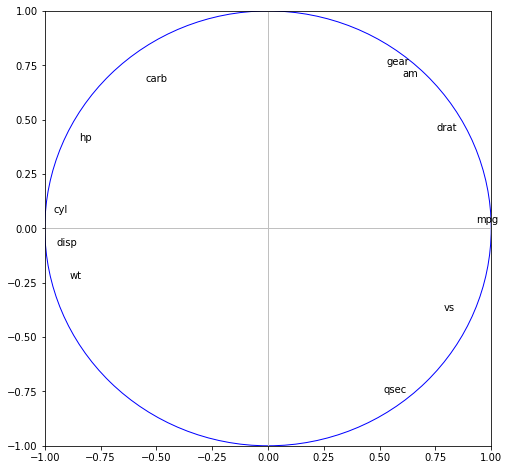

In [ ]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()


Interprétation:
- Angle entre deux variables proche de 0: Corrélation positive
- Angle entre deux variables proche de 180: Corrélation négative
- Angle entre deux variables proche de 90: Pas de Corrélation 



Qualité de représentation des variables (COS²)


In [ ]:
#cosinus carré des variables
#La qualité de représentation des variables par rapport aux axes
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id    COS2_1    COS2_2
0    mpg  0.868531  0.000689
1    cyl  0.923942  0.005072
2   disp  0.895837  0.006448
3     hp  0.719903  0.164047
4   drat  0.571792  0.199996
5     wt  0.791604  0.054228
6   qsec  0.265544  0.569098
7     vs  0.620854  0.142225
8     am  0.364772  0.488745
9   gear  0.282934  0.566581
10  carb  0.302688  0.453339


In [ ]:
#Contribution des variables aux axes 
#contributions
ctrvar = cos2var
for k in range(p):
 ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    mpg  0.019888  0.000098
1    cyl  0.021157  0.000722
2   disp  0.020513  0.000918
3     hp  0.016485  0.023352
4   drat  0.013093  0.028469
5     wt  0.018127  0.007719
6   qsec  0.006081  0.081011
7     vs  0.014217  0.020246
8     am  0.008353  0.069572
9   gear  0.006479  0.080652
10  carb  0.006931  0.064532
